In [21]:
#Import all the necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [22]:
#Import the dataset
data=pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.shape #768 rows and 9 columns

(768, 9)

In [24]:
data.isnull().values.any()#If any null value is present it should be removed or filled according to the data

False

In [25]:
import seaborn as sns
diabcor = data.corr() #corr() function is used to find the correlation between columns
diabcor#The below data represents the correlation between each column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


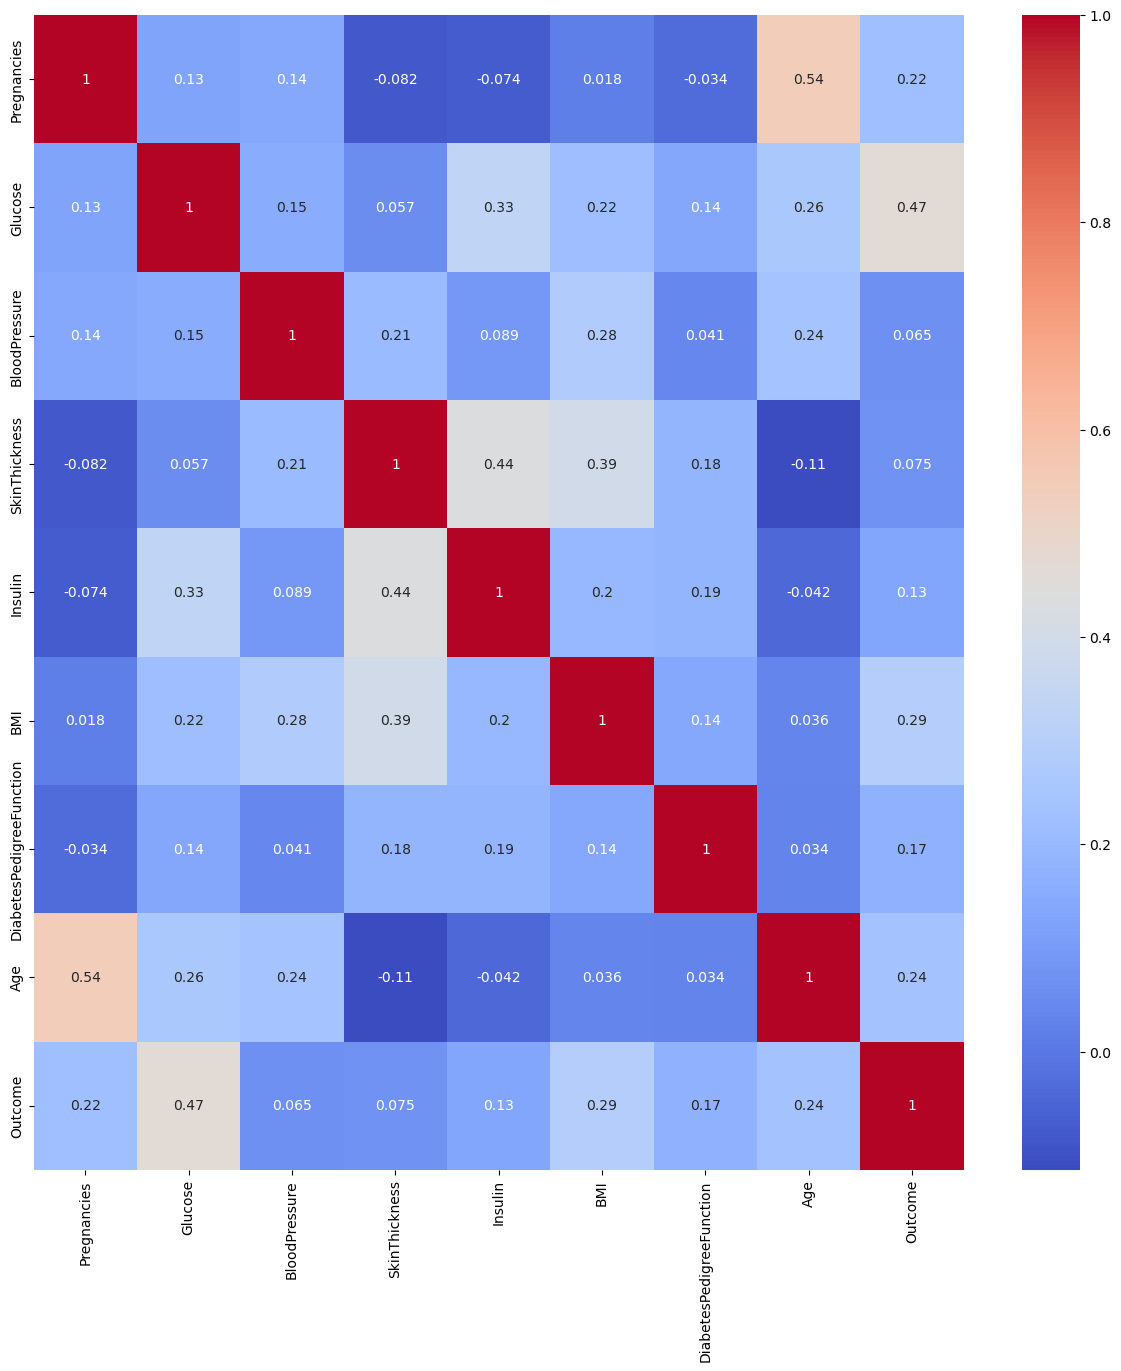

In [26]:
plt.figure(figsize=(15,15))
#This correlation is visualized using heatmap which is imported in the program using seaborn package
g=sns.heatmap(diabcor,annot=True,cmap='coolwarm')

In [27]:
total_count=(data['Outcome']==1).value_counts()
total_count

False    500
True     268
Name: Outcome, dtype: int64

In [28]:
#Identify the total number of true and false counts
true_count=total_count[1]
false_count=total_count[0]
(true_count,false_count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
from sklearn.model_selection import train_test_split

# Define feature columns and the target variable
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']


In [30]:
# Extract features (X) and target variable (y) from the dataset
X = data[feature_columns].values
y = data[predicted_class].values

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [31]:
print("Total number of rows : {0}".format(len(data)))
print("Number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("Number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("Number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("Number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("Number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("Number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

Total number of rows : 768
Number of rows missing Pregnancies: 111
Number of rows missing Glucose: 5
Number of rows missing BloodPressure: 35
Number of rows missing Insulin: 374
Number of rows missing BMI: 11
Number of rows missing DiabetesPedigreeFunction: 0
Number of rows missing Age: 0
Number of rows missing SkinThickness: 227


In [32]:
#Train and test the data
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [34]:
#Find the best hyperparameters to get the exact accuracy
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=10,
    n_jobs=None,
    oob_score=False,
    random_state=10,
    verbose=0,
    warm_start=False
)


In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [36]:
predict_test_data = random_forest_model.predict(X_test)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predict_test_data)
print("Accuracy = {0:.3f}".format(accuracy))

Accuracy = 0.762


In [39]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
# Perform hyperparameter optimization using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=10),
    param_distributions=params,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=10
)

In [43]:
# Fit the model with training data
random_search.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=10, scoring='accuracy', verbose=3)

In [45]:
# Get the best parameters and the corresponding estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4}


In [47]:
# Predictions using the best estimator
predict_test_data = best_estimator.predict(X_test)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test, predict_test_data)
print("Best Score = {0:.3f}".format(accuracy))


Best Score = 0.745


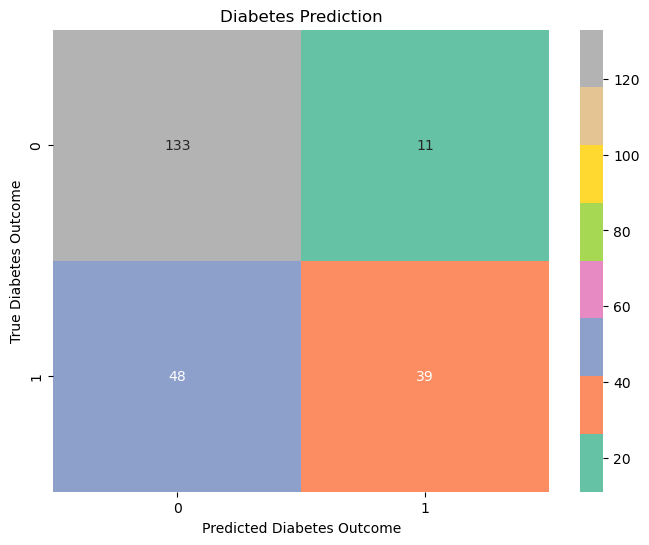

In [49]:
# Plotting predictions
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, predict_test_data), annot=True, fmt='d', cmap='Set2')
plt.xlabel('Predicted Diabetes Outcome')
plt.ylabel('True Diabetes Outcome')
plt.title('Diabetes Prediction')
plt.show()

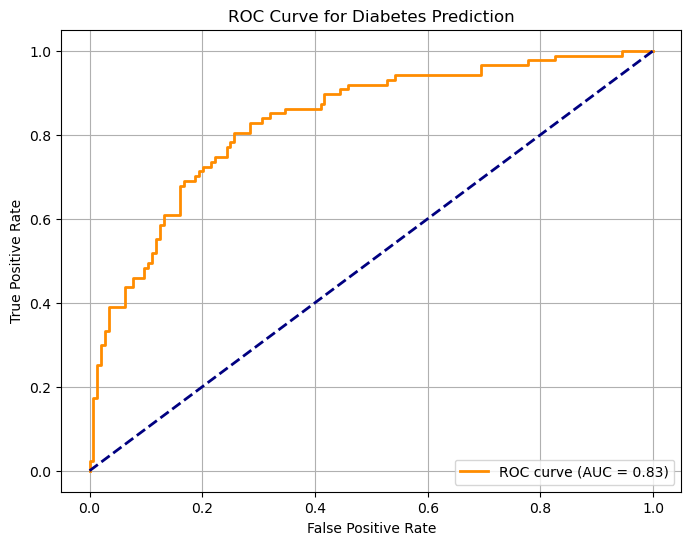

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_probs = best_estimator.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


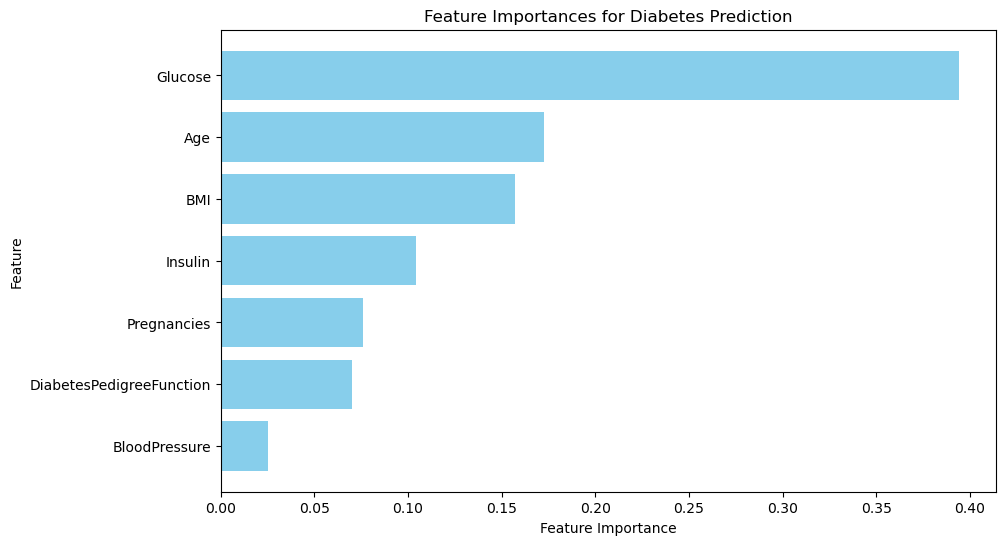

In [52]:

feature_importances = best_estimator.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Diabetes Prediction')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()


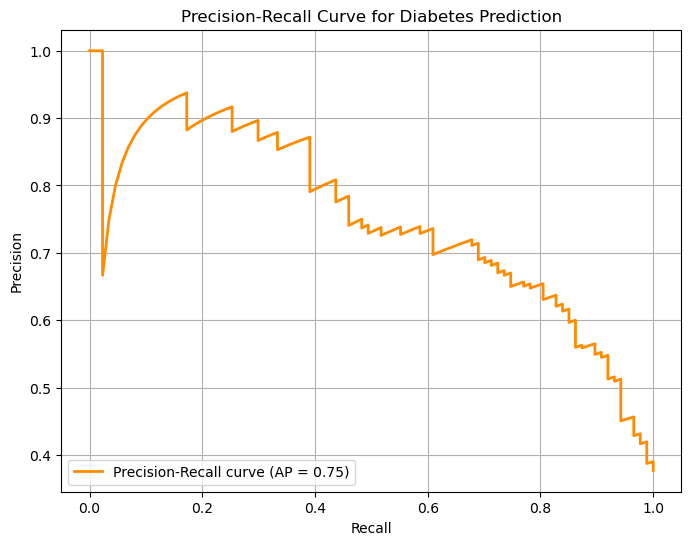

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get probabilities of the positive class
y_probs = best_estimator.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Diabetes Prediction')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
